## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')

# Display the data table for preview
# merged_df.head()
merged_df = merged_df.rename(columns={"Age_months":"Age (months)"})
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = len( merged_df['Mouse ID'].value_counts())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id = pd.DataFrame(duplicate_mice)
duplicate_id

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[ merged_df[ 'Mouse ID'].isin( duplicate_mice) == False]

In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len( clean_df[ 'Mouse ID'].value_counts())
mice_count_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_drugs = clean_df.groupby(['Drug Regimen'])
#grouped_drugs.count().head(15)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = grouped_drugs['Tumor Volume (mm3)'].mean()
tumor_median = grouped_drugs['Tumor Volume (mm3)'].median()
tumor_variance = grouped_drugs['Tumor Volume (mm3)'].var()
tumor_stdev = grouped_drugs['Tumor Volume (mm3)'].std()
tumor_sem = grouped_drugs['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_stats = pd.DataFrame({'Mean Tumor Volume (mm3)': tumor_mean,
                            'Median Tumor Volume (mm3)': tumor_median,
                            'Variance of Tumor Volume (mm3)': tumor_variance,
                            'Std Deviation of Tumor Volume (mm3)': tumor_stdev,
                            'SEM of Tumor Volume (mm3)': tumor_sem
                            })

tumor_stats

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Std Deviation of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_stats = clean_df.groupby([ 'Drug Regimen'])[[ 'Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregated_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Count measurements
measurements = grouped_drugs['Drug Regimen'].count().sort_values(ascending=False)
#measurements


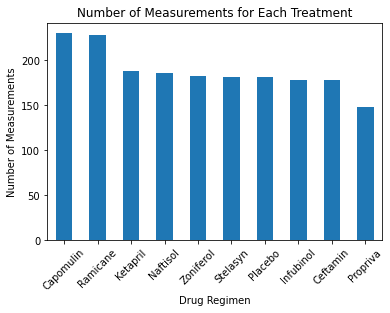

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_chart_pd = measurements.plot( kind = 'bar', alpha = 1, align = 'center')

# Set title and labels for x- and y-axes:
measurements_chart_pd.set_title('Number of Measurements for Each Treatment')
measurements_chart_pd.set_xlabel('Drug Regimen')
measurements_chart_pd.set_ylabel('Number of Measurements')

# Set tick marks:
for tick in measurements_chart_pd.get_xticklabels():
    tick.set_rotation(45)
    
plt.show()

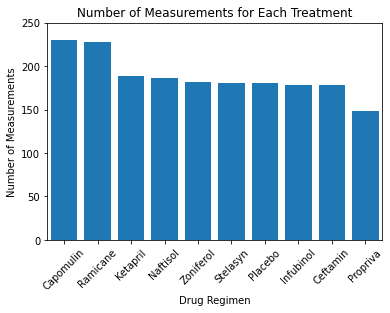

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = np.arange( len( measurements))
measurements_chart_plt = plt.bar( x_axis, measurements, alpha= 1, align = "center")

# Set tick marks for x:
drug_names = [ 'Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Stelasyn','Placebo','Infubinol','Ceftamin','Propriva'] # Find the way to use df for this step to eliminate manual drug inpt ***start with: drug_name=drr['Drug Regimen'].unique()***
tick_loc = [ value for value in x_axis]
plt.xticks( tick_loc, drug_names, rotation = 45)

# Set the limits of the y axis:
plt.ylim( 0, max( measurements) + 20)

# Set the limits of the x axis:
plt.xlim( -0.50, len( x_axis) - 0.50)

# Set a title, x-label, and y-label:
plt.title('Number of Measurements for Each Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel( 'Number of Measurements')

plt.show()

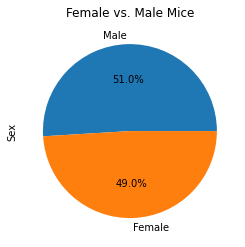

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df[ 'Sex'].value_counts()
plt.title( 'Female vs. Male Mice')
gender.plot.pie( autopct= '%1.1f%%')

plt.show()

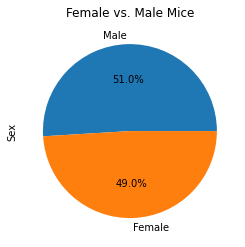

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = [ 'Female', 'Male']
plot = gender.plot.pie( y = 'Total Count', autopct = "%1.1f%%")
plt.title( 'Female vs. Male Mice')
plt.ylabel( 'Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Instructions
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [ 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [16]:
# Create subset data frame
top_regimen_df = clean_df[ clean_df[ 'Drug Regimen'].isin( treatments)]
top_regimen_df.head()

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = top_regimen_df.groupby([ 'Drug Regimen', 'Mouse ID']).agg( tumor_size=( 'Tumor Volume (mm3)', lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level= 0).unstack(level= 0)

In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Determine outliers using upper and lower bounds

for regimen in treatments:
    quartiles = last_timepoint[ regimen].quantile([ .25, .5, .75])
    lowerq = quartiles[ 0.25]
    upperq = quartiles[ 0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - ( 1.5 * iqr)
    upper_bound = upperq + ( 1.5 * iqr)
    
    print( f'The lower quartile of {regimen} tumor volumes: {lowerq:,.2f}')
    print( f'The upper quartile of {regimen} tumor volumes: {upperq:,.2f}')
    print( f'The interquartile range of {regimen} tumor volumes: {iqr:,.2f}')
    print( f'Values below {lower_bound:,.2f} could be {regimen} outliers.')
    print( f'Values above {upper_bound:,.2f} could be {regimen} outliers.')
    print( f"------------------------------------------------------------")

The lower quartile of Capomulin tumor volumes: 32.38
The upper quartile of Capomulin tumor volumes: 40.16
The interquartile range of Capomulin tumor volumes: 7.78
Values below 20.70 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane tumor volumes: 31.56
The upper quartile of Ramicane tumor volumes: 40.66
The interquartile range of Ramicane tumor volumes: 9.10
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol tumor volumes: 54.05
The upper quartile of Infubinol tumor volumes: 65.53
The interquartile range of Infubinol tumor volumes: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.74 could be Infubinol outliers.
------------------------------------------------------------
The lower quartile of Ceftamin tumor volumes

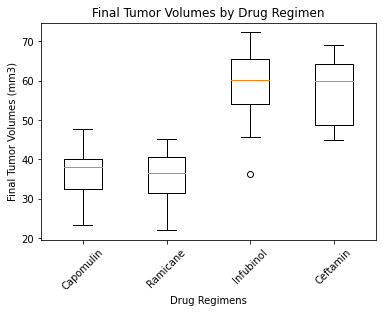

In [19]:
# Create empty list to fill with tumor vol data (for plotting)
bplot_list = []

# Fill list with tumor vol data
for regimen in treatments:
    bplot_list.append( list( last_timepoint[ regimen].dropna()))
    
# Create box plot of the final tumor volume for each mouse for each regimen
fig = plt.figure()
plt.boxplot( bplot_list)

plt.title( 'Final Tumor Volumes by Drug Regimen')
plt.xlabel( 'Drug Regimens')
plt.xticks( [1, 2, 3, 4], treatments, rotation= 45)
plt.ylabel( 'Final Tumor Volumes (mm3)')

plt.show()

## Line and Scatter Plots

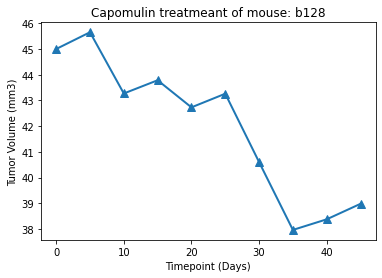

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Set mouse ID as variable to easily change in data frame (DF) and plot title
mouse_id = 'b128'

# Create DF for just Capomulin data (for use here and later)
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

# Create DF for line plot
line_df = capomulin_df.loc[ capomulin_df[ 'Mouse ID'] == mouse_id]

# Set plot variables
timepoint = line_df[ 'Timepoint']
tumor_vol = line_df[ 'Tumor Volume (mm3)']

fig, ax = plt.subplots()

# Generate Line Plot
plt.plot(timepoint, tumor_vol, linewidth= 2, markersize= 8, marker= '^')

# Add title and labels
plt.title(f'Capomulin treatmeant of mouse: {mouse_id}')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

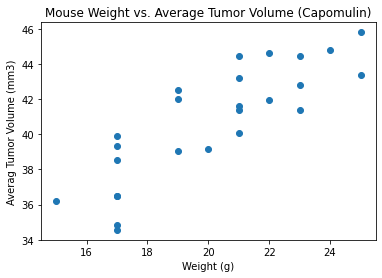

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create DF
avg_cap_vol = capomulin_df.groupby([ 'Mouse ID']).mean()
mouse_weight = avg_cap_vol[ 'Weight (g)']
mouse_tumor_vol = avg_cap_vol[ 'Tumor Volume (mm3)']

fig, ax = plt.subplots()

# Generate Scatter Plot
plt.scatter( mouse_weight, mouse_tumor_vol)

# Add title and labels
plt.title( 'Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel( 'Weight (g)')
plt.ylabel( 'Averag Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [22]:
# Instructions
    # Calculate the correlation coefficient and linear regression model 
    # for mouse weight and average tumor volume for the Capomulin regimen

In [23]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr( mouse_weight, mouse_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is: {correlation[0]:,.2f}")

The correlation between mouse weight and the average tumor volume is: 0.84


The r-squared is: 0.7089


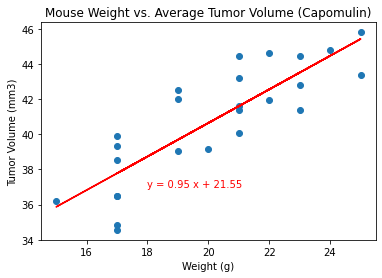

In [24]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, mouse_tumor_vol)
regression = mouse_weight * slope + intercept

# Convert regression to printable/ human-readable equation
line_equation = f'y = {slope:,.2f} x + {intercept:,.2f}'

# Generate scatter plot and add regression line and equation annotation
plt.scatter( mouse_weight, mouse_tumor_vol)
plt.plot( mouse_weight, regression, color= 'red')
plt.annotate( line_equation, (18, 37), color= 'red')

# Add title, labels, and print note re: r-squared
plt.xlabel( 'Weight (g)')
plt.ylabel( 'Tumor Volume (mm3)')
plt.title( 'Mouse Weight vs. Average Tumor Volume (Capomulin)')
print(f'The r-squared is: {rvalue**2:,.4f}')
      
plt.show()